# Diamonds

Using the Diamonds.csv file, predict price (y) from carat (x)

## Non-polynomial Model

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('Diamonds.csv')
data.head()

,price,carat
0,12011.62,1.47
1,14109.82,3.06
2,3152.99,0.21
3,10959.33,1.88
4,8310.06,1.24


Create X and Y train and test datasets (Train w/ 75% of data)

In [4]:
X = sm.add_constant(data[['carat']])
y = data['price']

/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [6]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

(500, 2)
(500,)
(375, 2)
(375,)
(125, 2)
(125,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.intercept_

1993.0987830074318

Report the R^2 value

In [8]:
model.score(X_test, y_test)

0.6911414456930445

In [9]:
model.coef_

array([   0.        , 4509.08068296])

In [10]:
model = sm.OLS(y_train, X_train).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     568.3
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           5.64e-77
Time:                        09:27:38   Log-Likelihood:                -3603.0
No. Observations:                 375   AIC:                             7210.
Df Residuals:                     373   BIC:                             7218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1993.0988    370.045      5.386      0.000    1265.464    2720.734
carat       4509.0807    189.153     23.838      0.000    4137.140    4881.021
==============================================================================
Omnibus:                       23.992   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.610
Skew:                          -0.524   Prob(JB):                     2.25e-07
Kurtosis:                       3.928   Cond. No.                         4.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

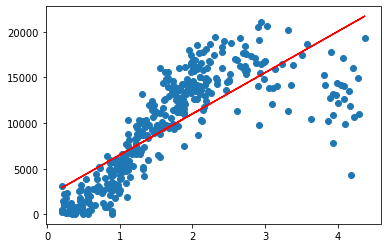

In [12]:
plt.scatter(X_train['carat'], y_train)
plt.plot(X_train['carat'], model.predict(X_train), color='red')
plt.show()

In [13]:
predictions = model.predict(X_test)

In [14]:
resids = y_test - predictions

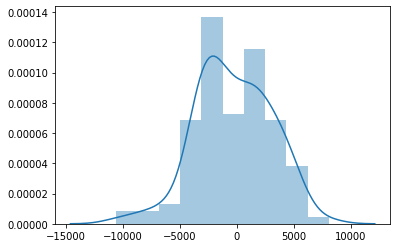

In [15]:
sns.distplot(resids)
plt.show()

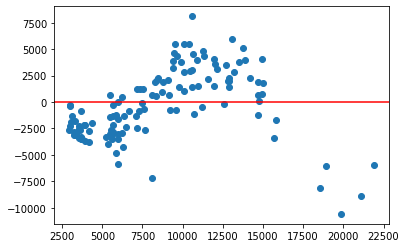

In [16]:
plt.scatter(predictions, resids)
plt.axhline(color='red')
plt.show()

Regression Model Assumptions:
* Linearity: While the plotted residuals above looks somewhat linear, I would not say that they follow a linear pattern, so this assumption does not hold. 
* Normalcy: The distribution of residuals seems Gaussian enough that I can say this assumption holds.
* Homoscedasticity: I think this assumption also does not hold, because the points seem to fan out in a triangular fashion, which from what I could find online means that this assumption is false.

## Polynomial Model

In [17]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
X_train = polynomial_features.fit_transform(X_train)
X_test = polynomial_features.fit_transform(X_test)
print(y_train.shape)
print(y_test.shape)

(375,)
(125,)


In [18]:
model = sm.OLS(y_train, X_train).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     942.1
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.47e-146
Time:                        09:27:39   Log-Likelihood:                -3438.6
No. Observations:                 375   AIC:                             6883.
Df Residuals:                     372   BIC:                             6895.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1718.4620    131.236    -13.094      0.000   -1976.519   -1460.405
x1         -1718.4620    131.236    -13.094      0.000   -1976.519   -1460.405
x2          6942.8718    214.086     32.430      0.000    6521.901    7363.843
x3         -1718.4620    131.236    -13.094      0.000   -1976.519   -1460.405
x4          6942.8718    214.086     32.430      0.000    6521.901    7363.843
x5         -2272.1830     99.443    -22.849      0.000   -2467.723   -2076.643
==============================================================================
Omnibus:                        3.803   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.718
Skew:                          -0.167   Prob(JB):                        0.156
Kurtosis:                       3.356   Cond. No.                     1.88e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Using a polynomial of degree 2 seems to be the best solution, because using polynomials of higher degrees results in larger R^2 values.

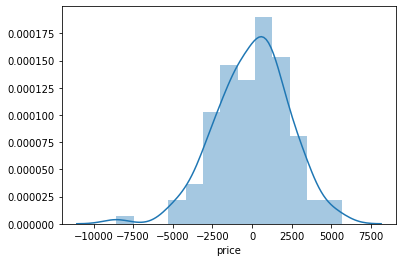

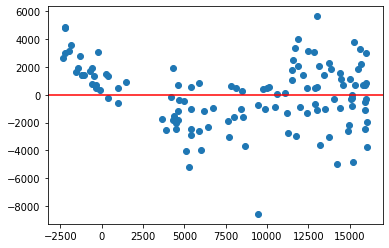

In [20]:
predictions = model.predict(X_test)
resids = y_test - predictions

sns.distplot(resids)
plt.show()

plt.scatter(predictions, resids)
plt.axhline(color='red')
plt.show()

# College

In [167]:
data = pd.read_csv('College.csv')

data['Private'] = data['Private'].map({'Yes': 1, 'No': 0})
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [168]:
X = data[['Private', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend', 'Grad_Rate']]
y = data['Apps']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(777, 16)
(777,)
(582, 16)
(582,)
(195, 16)
(195,)


## Linear Regression

In [169]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9498613639382587


## Ridge Regression

#### Determine λ

In [170]:
possibleAlphas = 10**np.linspace(6,-2,50)*.5

model = RidgeCV(alphas=possibleAlphas, normalize=True)
model.fit(X_train, y_train)

λ = model.alpha_
print(λ)

0.005


#### Use λ on ridge regression

In [171]:
model = Ridge(alpha=λ, normalize=True)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9491179703228539


## Lassso Regression

#### Determine λ

In [172]:
model = LassoCV(alphas=None, n_alphas=200,cv=10, max_iter=100000, normalize=True, random_state=1)

model.fit(X_train, y_train)

λ = model.alpha_
print(λ)

0.9363675626208156


#### Use λ on ridge regression

In [173]:
model = Lasso(alpha=λ, normalize=True)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9443587354401161


## PCR Regression

In [174]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
component = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
i = 0
for x in component:
    i = i + 1
    if x > 90:
        print("We need " + str(i) + " components to explain 90% of variability (reaching " + str(x) + "%).")
        break

We need 9 components to explain 90% of variability (reaching 92.27000000000002%).


In [175]:
model = linear_model.LinearRegression()
y_train = scale(y_train)
model.fit(X_reduced, y_train)
y_cv = cross_val_predict(model, X_reduced, y_train, cv=10)
mse_cv = mean_squared_error(y_train, y_cv)
print(mse_cv)

0.09943478443873749


Linear, lasso, and ridge regression all had similar model scores. However, we would recommend using the PCR model since it has the ability to find which features are most valuable and potentially avoid overfitting. 

## Weekly 

In [158]:
weekly = pd.read_csv('Weekly.csv')
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


#### Create visuals and report any patterns

In [159]:
weekly.groupby('Year').mean()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.008447,0.061319,-0.054511,-0.053340,-0.163979,0.154797,-0.058894,0.510638
1991,0.426404,0.312346,0.328500,0.295788,0.308904,0.178047,0.532519,0.596154
1992,0.159750,0.262827,0.242192,0.262000,0.273385,0.202925,0.081058,0.557692
1993,0.122788,0.112096,0.135423,0.146846,0.147750,0.264237,0.136712,0.596154
1994,-0.022096,-0.022288,-0.063077,-0.040154,-0.036846,0.290375,-0.020615,0.519231
1995,0.555462,0.573462,0.627962,0.567788,0.549615,0.344762,0.570308,0.692308
1996,0.416585,0.383189,0.327321,0.387925,0.453377,0.407590,0.382472,0.603774
1997,0.432731,0.474038,0.540750,0.571673,0.470269,0.523199,0.534231,0.538462
1998,0.553192,0.470327,0.421442,0.378827,0.461135,0.668851,0.478596,0.634615


By grouping the data by year, we are able to see the mean of each Lag, volume, today, and the amount of Ups in a given year. One pattern that is noticable is that the direction will be Up on average .55 if Lags 1-4 were positive as well as the volume. 

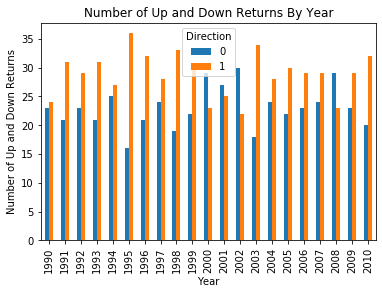

In [102]:
%matplotlib inline
pd.crosstab(weekly.Year,weekly.Direction).plot(kind='bar')
plt.title('Number of Up and Down Returns By Year')
plt.xlabel('Year')
plt.ylabel('Number of Up and Down Returns')
plt.savefig('UpAndDownByYear')

From this graph, it amount of Up returns generally outnumbered the amount of Down returns. 

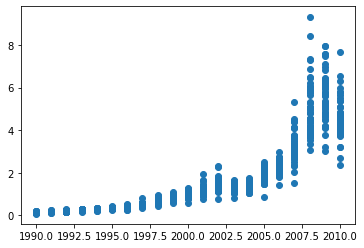

In [103]:
plt.scatter(weekly.Year, weekly.Volume)

From this graph, it appears that there is more and more volume as the year increases. 

## Train and Test for Logistic Regression

In [106]:
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Y = weekly['Direction']

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [119]:
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685940
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  816
Model:                          Logit   Df Residuals:                      810
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:              -0.0009126
Time:                        09:43:30   Log-Likelihood:                -559.73
converged:                       True   LL-Null:                       -559.22
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0158      0.029     -0.548      0.583      -0.072       0.041
Lag2           0.0912      0.

From the coeffients, Lag2 and Volume are the two predictors that are associated with a higher probability of Up. Lag4 is the predictor associated with a lower probability of Up. 

In [117]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, predictions)
print(confusion_matrix)

[[ 19 108]
 [ 23 123]]


From the confusion matrix, we can see that our predicitions are correct about 52% of the time. This tells us that using Logistic regression can potentiall "confuse" our model and make inaccurate predictions. 

Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as
the only predictor. Compute the confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [121]:
newWeekly = weekly[weekly['Year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', 
                                       '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                                       '2005', '2006', '2007', '2008']) ]
newWeekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
980,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,0
981,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,1
982,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,1
983,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,0
984,2008,-1.698,0.926,0.418,-2.251,12.026,3.087105,6.760,1


In [131]:
X_New = newWeekly[['Lag2']]
Y_New = newWeekly['Direction']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_New, Y_New, random_state=12)
logit_model=sm.Logit(Y_train1,X_train1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689993
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  738
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:               -0.005790
Time:                        10:07:12   Log-Likelihood:                -509.21
converged:                       True   LL-Null:                       -506.28
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0714      0.034      2.126      0.033       0.006       0.137


In [157]:
logmodel = LogisticRegression()
logmodel.fit(X_train1,Y_train1)
predictions1 = logmodel.predict(X_test1)

/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test1, predictions1)
print(cfm)

[[  6 110]
 [  5 126]]


The accuracy from the confusion matrix for the years 1990-2008 is 53.4%. Based off the accuracy of correct predictions from earlier (52%), by removing 2009 and 2010, our model is more accurate. 

#### Repeat (d), experiementing with different combinations of predictors (you could also try transforming predictors and/or including interactions) Select the “best” model for the held out data. Show the confusion matrix, ROC curve and AUC of the held out data for the model you selected.

In [139]:
X_New = newWeekly[['Volume']]
Y_New = newWeekly['Direction']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_New, Y_New, random_state=12)
logit_model=sm.Logit(Y_train1,X_train1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691932
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  738
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:               -0.008617
Time:                        10:28:43   Log-Likelihood:                -510.65
converged:                       True   LL-Null:                       -506.28
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0578      0.043      1.333      0.182      -0.027       0.143


In [156]:
logmodel = LogisticRegression()
logmodel.fit(X_train1,Y_train1)
predictions1 = logmodel.predict(X_test1)

/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [141]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test1, predictions1)
print(cfm)

[[  7 109]
 [  3 128]]


Through this confusion matrix, we can see that our correct predictions accuracy increased by a little over 1%. 

In [142]:
X_New = newWeekly[['Lag4']]
Y_New = newWeekly['Direction']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_New, Y_New, random_state=12)
logit_model=sm.Logit(Y_train1,X_train1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692975
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  738
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:                -0.01014
Time:                        14:39:42   Log-Likelihood:                -511.42
converged:                       True   LL-Null:                       -506.28
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag4          -0.0168      0.033     -0.504      0.614      -0.082       0.048


In [143]:
logmodel = LogisticRegression()
logmodel.fit(X_train1,Y_train1)
predictions1 = logmodel.predict(X_test1)

/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [144]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test1, predictions1)
print(cfm)

[[  0 116]
 [  0 131]]


The accuracy of the confusion matrix using Lag4 as the predictor and the years 1990-2008 is slightly lower than
the accuracy using Volume. 

We will construct a ROC and AUC using the model that took the years from 1990 to 2008 and using Volume as the predictor.

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
X_New = newWeekly[['Volume']]
Y_New = newWeekly['Direction']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_New, Y_New, random_state=12)
logit_model=sm.Logit(Y_train1,X_train1)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.691932
         Iterations 4
AUC: 0.52


/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [151]:
logmodel = LogisticRegression()
logmodel.fit(X_train1,Y_train1)
predictions1 = logmodel.predict(X_test1)
auc = roc_auc_score(Y_test1, predictions1)

AUC: 0.52


/Users/jacobtonini/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [152]:
fpr, tpr, thresholds = roc_curve(Y_test1, predictions1)

## AUC, ROC Curve, and Confusion Matrix

AUC for Volume and years 1990-2008

In [154]:
print('AUC: %.2f' % auc)

AUC: 0.52


ROC Curve for Volume with years 1990-2008

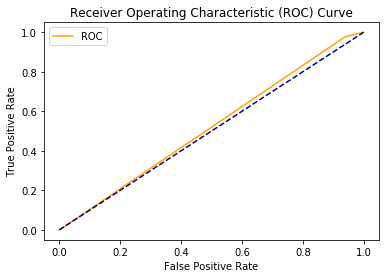

In [153]:
plot_roc_curve(fpr, tpr)

Confusion Matrix for Volume as predictor 

In [155]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test1, predictions1)
print(cfm)

[[  7 109]
 [  3 128]]
